In [0]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf

In [0]:
train_path = '/content/drive/My Drive/Colab Notebooks/PIR/DataSet/TrainSet/' 
valid_path = '/content/drive/My Drive/Colab Notebooks/PIR/DataSet/ValidationSet/'
test_path = '/content/drive/My Drive/Colab Notebooks/PIR/DataSet/TestSet/'

train_image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [0]:
import os
entries = os.listdir(train_path)
folders = glob(train_path + '/*')
train_class_dist={}
count=0
for folder in folders:
  number_of_images=glob(folder+'/*.jp*g')
  train_class_dist[entries[count]]=len(number_of_images)
  count+=1

valid_entries = os.listdir(valid_path)
valid_folders = glob(valid_path + '/*')
valid_class_dist={}
count=0
for folder in valid_folders:
  valid_number_of_images=glob(folder+'/*.jp*g')
  valid_class_dist[entries[count]]=len(valid_number_of_images)
  count+=1



In [45]:
import plotly.express as px

fig = px.bar(train_class_dist.keys(), x=list(train_class_dist.keys()), y=list(train_class_dist.values()),labels={"y":"Class Size", "x":"Fruits and Vegetables"},title="Train DataSet")
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')

fig.show()

In [46]:

import plotly.express as px

fig = px.bar(valid_class_dist.keys(), x=list(valid_class_dist.keys()), y=list(valid_class_dist.values()),labels={"y":"Class Size", "x":"Fruits and Vegetables"},title="Validation DataSet")
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')

fig.show()

In [0]:
IMAGE_SIZE = [100, 100]
epochs = 10
train_batch_size =8
valid_batch_size=4
test_batch_size=4


In [48]:
gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=0,
        zoom_range=0.4,
       

 
)
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 5520 images belonging to 18 classes.
{'Apple': 0, 'Avocado': 1, 'Banana': 2, 'Brocolli': 3, 'Canada Pear': 4, 'Carrot': 5, 'Green Peas': 6, 'Green Pepper': 7, 'Lettuce': 8, 'Mangoes': 9, 'Okra': 10, 'Orange': 11, 'Pineapple': 12, 'Red Chilli': 13, 'Red Onions': 14, 'Spring Onion': 15, 'Tomato': 16, 'bell pepper': 17}


Found 13749 images belonging to 18 classes.


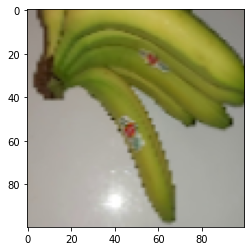

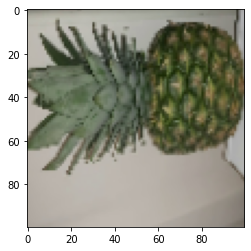

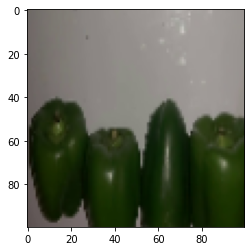

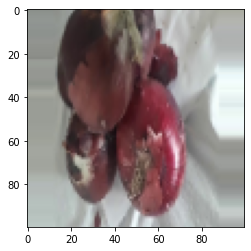

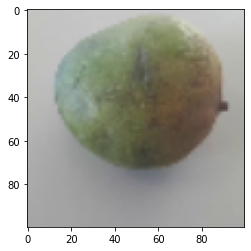

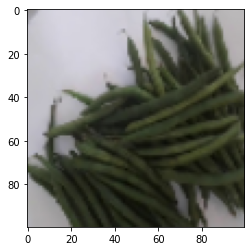

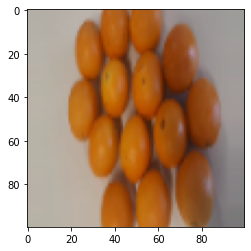

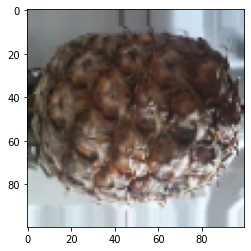

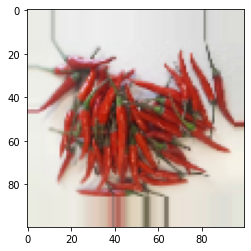

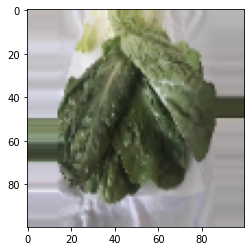

In [49]:

tgr = gen.flow_from_directory(
    train_path,
    color_mode = "rgb",
    target_size=(100,100),
    batch_size=1,
    class_mode=None)


i = 0
img_list = []
for batch in tgr:
    img_list.append(batch)
    i += 1
    if i > 9:
        break
        

for img in img_list:
    plt.imshow(np.squeeze(img))
    plt.show()

In [50]:
train_generator = gen.flow_from_directory(
  train_path,
  color_mode = "rgb",
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=train_batch_size,
    
)
valid_generator = gen.flow_from_directory(
  valid_path,
  color_mode = "rgb",
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=valid_batch_size,
)
test_generator = gen.flow_from_directory(
  test_path,
  color_mode = "rgb",
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=test_batch_size,
)

Found 13749 images belonging to 18 classes.
Found 5520 images belonging to 18 classes.
Found 5592 images belonging to 18 classes.


In [51]:
#import inception with pre-trained weights. do not include fully #connected layers
res = applications.ResNet50(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = res.output
x = GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = Dense(512, activation='relu')(x)
# and a fully connected output/classification layer
predictions = Dense(18, activation='softmax')(x)
# create the full network so we can train on it
model = Model(inputs=res.input, outputs=predictions)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning:

The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.



In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [32]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17686938827963071598
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3766140401847960662
physical_device_desc: "device: XLA_CPU device"
]


In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/My Drive/res_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=0, verbose=1, mode='auto')

r=model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  callbacks=[checkpoint,early],
  steps_per_epoch=len(train_image_files) // train_batch_size,
  validation_steps=len(valid_image_files) //valid_batch_size,
 
  
)

Epoch 1/10
1718/1718 [==============================] - 4005s 2s/step - loss: 0.4825 - acc: 0.9015 - val_loss: 0.0115 - val_acc: 0.9987

Epoch 00001: val_acc improved from -inf to 0.99873, saving model to /content/drive/My Drive/res_1.h5
Epoch 2/10
1718/1718 [==============================] - 4007s 2s/step - loss: 0.0648 - acc: 0.9880 - val_loss: 0.0037 - val_acc: 0.9993

Epoch 00002: val_acc improved from 0.99873 to 0.99928, saving model to /content/drive/My Drive/res_1.h5
Epoch 3/10
1718/1718 [==============================] - 3981s 2s/step - loss: 0.0378 - acc: 0.9930 - val_loss: 0.0023 - val_acc: 0.9995

Epoch 00003: val_acc improved from 0.99928 to 0.99946, saving model to /content/drive/My Drive/res_1.h5
Epoch 4/10
1718/1718 [==============================] - 3961s 2s/step - loss: 0.0225 - acc: 0.9969 - val_loss: 0.0015 - val_acc: 0.9998

Epoch 00004: val_acc improved from 0.99946 to 0.99982, saving model to /content/drive/My Drive/res_1.h5
Epoch 5/10
1464/1718 [=================

In [0]:
model.save("/content/drive/My Drive/res_n.h5")

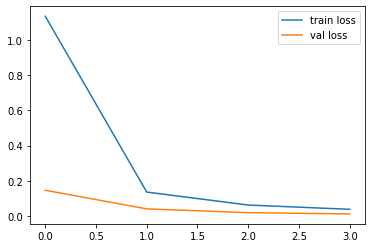

In [35]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')

plt.legend()
plt.show()

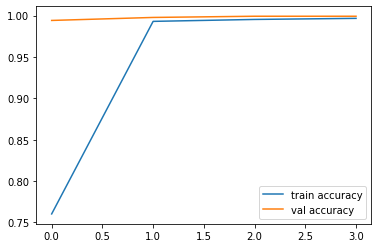

In [36]:
plt.plot(r.history['acc'], label='train accuracy')
plt.plot(r.history['val_acc'], label='val accuracy')
plt.legend()
plt.show()

In [0]:
model = load_model('/content/drive/My Drive/res_n.h5')

In [0]:
model.compile(loss='categorical_crossentropy',
     optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
     metrics=['accuracy'])


In [0]:
test_image_files = glob(test_path + '/*/*.jp*g')

In [40]:
loss, acc = model.evaluate_generator(test_generator, steps=len(test_image_files) // test_batch_size)

KeyboardInterrupt: ignored